In [51]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# 指定URL
url = "https://global.rakuten.com/corp/investors/stock/bond.html"

# 指定USD与EUR汇率
USDJPY = 150.0
EURJPY = 160.0


# 通过requests返回url内容
response = requests.get(url)

# 解析url中的HTML文档
soup = BeautifulSoup(response.content, "html.parser")

In [52]:
# 获取Straight Bond Information
straight_bond = soup.find("section", class_="rf-section").find("table", class_="rf-table")
bond_colname = straight_bond.find_all("tr")[0]  #获取表格的列名称
straight_bond_rows = straight_bond.find_all("tr")[1:] 

# 确认第一行信息
print(straight_bond_rows[0])

<tr>
<th data-label="Bond Name" scope="row">JPY-denominated Unsecured Bond due April 2029</th>
<td data-label="Issue Date (Payment Date)">April 24,<br/>2024</td>
<td data-label="Maturity Date">April 24,<br/>2029</td>
<td data-label="Term">5 Years</td>
<td data-label="Outstanding Amount">JPY 50bn</td>
<td data-label="Coupon Rate">6.00%</td>
<td data-label="Investment Unit">*6</td>
</tr>


In [53]:
# 获取Subordinated Bonds Information
subordinated_bond = soup.find_all("section", class_="rf-section")[1].find("table", class_="rf-table")
subordinated_bond_rows = subordinated_bond.find_all("tr")[1:] 

# 确认第一行信息
print(subordinated_bond_rows[0])

<tr>
<th data-label="Bond Name" scope="row">Undated Subordinated NC5 Fixed Rate Reset Notes</th>
<td data-label="Issue Date (Payment Date)">April 22,<br/>2021</td>
<td data-label="Maturity Date">No Maturity<sup>*1</sup></td>
<td data-label="Term">No Maturity</td>
<td data-label="Outstanding Amount">USD 750m<br/>(JPY 82bn)*15</td>
<td data-label="Coupon Rate">3.98746%*12</td>
<td data-label="Investment Unit">*4</td>
</tr>


In [54]:
# 定义存储债券信息的列表
straight_bond_info = []
subordinated_bond_info = []

In [55]:
# 从Straight Bond Information中获取信息并添加至列表中
for row in straight_bond_rows:
    bond_data = [data.get_text(strip=True) for data in row.find_all("th") + row.find_all("td")]
    print(bond_data)
    straight_bond_info.append(bond_data)

# 将list数据转化为numpy数据，以方便后续操作
straight_bond_np = np.array(straight_bond_info)

['JPY-denominated Unsecured Bond due April 2029', 'April 24,2024', 'April 24,2029', '5 Years', 'JPY 50bn', '6.00%', '*6']
['USD-denominated Unsecured Bond due April 2029', 'April 10,2024', 'April 15,2029', '5 Years', 'USD 2,000m(JPY 303bn)*7', '6.03932%*5', '*1']
['USD-denominated Unsecured Bond due February 2027', 'February 6,2024', 'February 15,2027', '3 Years', 'USD 1,800m(JPY 266bn)*7', '7.21457%*4', '*1']
['22nd Unsecured Bond', 'February 10,2023', 'February 10,2025', '2 Years', 'JPY 250bn', '3.30%', 'JPY 0.5m']
['USD-denominated Unsecured Bond due November 2024', 'November 30,2022', 'November 30,2024', '2 Years', 'USD 350m(JPY 49bn)*7', '5.30275%*3', '*1']
['21st Unsecured Bond', 'June 13,2022', 'June 13,2025', '3 Years', 'JPY 150bn', '0.72%', 'JPY 0.5m']
['20th Unsecured Bond', 'December 2,2021', 'December 2,2036', '15 Years', 'JPY 45bn', '1.50%', 'JPY 100m']
['19th Unsecured Bond', 'December 2,2021', 'December 2,2033', '12 Years', 'JPY 40bn', '1.30%', 'JPY 100m']
['18th Unsecur

In [56]:
# 从Subordinated Bonds Information中获取信息并添加至列表中
for row in subordinated_bond_rows:
    bond_data = [data.get_text(strip=True) for data in row.find_all("th") + row.find_all("td")]
    print(bond_data)
    subordinated_bond_info.append(bond_data)

# 将list数据转化为numpy数据，以方便后续操作
subordinated_bond_np = np.array(subordinated_bond_info)

['Undated Subordinated NC5 Fixed Rate Reset Notes', 'April 22,2021', 'No Maturity*1', 'No Maturity', 'USD 750m(JPY 82bn)*15', '3.98746%*12', '*4']
['Undated Subordinated NC6 Fixed Rate Reset Notes', 'April 22,2021', 'No Maturity*2', 'No Maturity', 'EUR 1bn(JPY 130bn)*15', '4.57890%*13', '*5']
['Undated Subordinated NC10 Fixed Rate Reset Notes', 'April 22,2021', 'No Maturity*3', 'No Maturity', 'USD 1bn(JPY 109bn)*15', '4.57247%*14', '*4']
['6th Subordinated Bond', 'November 4,2020', 'November 4,2060*6', '40 Years', 'JPY 50bn', '3.00%', 'JPY 100m']
['5th Subordinated Bond', 'November 4,2020', 'November 4,2057*7', '37 Years', 'JPY 20bn', '2.48%', 'JPY 100m']
['4th Subordinated Bond', 'November 4,2020', 'November 4,2055*8', '35 Years', 'JPY 50bn', '1.81%', 'JPY 100m']
['3rd Subordinated Bond', 'December 13,2018', 'December 13,2058*9', '40 Years', 'JPY 13bn', '3.00%', 'JPY 100m']
['2nd Subordinated Bond', 'December 13,2018', 'December 13,2055*10', '37 Years', 'JPY 26bn', '2.61%', 'JPY 100m'

In [57]:
# 将一般债券与劣后债上下结合
bond = np.concatenate((straight_bond_np,subordinated_bond_np))

In [58]:
##### 需要解决的问题
###### 0-如何设定永久劣后债（'Undated Subordinated NC5 Fixed Rate Reset Notes'）的到期日
###### 1-添加债券类型信息（有无到期日）
###### 2-如何去除附注（例如：'6.03932%*5' → '6.03932%'）
###### 3-如何提取货币信息
###### 4-如何统一金额单位

In [59]:
Maturity = []
BondType = []

for i in bond:
    #i[0]：债券名称
    #i[1]：债券发行日
    #i[2]：债券到期日    
    NonCall = ''.join(filter(str.isdigit, i[0]))                            # 提取债券名称中的数字信息（NonCall期间）

    if i[0].split(' ')[0] == 'Undated':                                     # 如果是永久劣后债券
        maturity = int(i[1].split('*')[0].split(',')[1])+int(NonCall)       # 提取发行日的年份信息 + NonCall期间
        Maturity.append(maturity)
        BondType.append('No Maturity')                                      # 将债券类别设置为'No Maturity'        
    
    else:
        maturity = i[2].split('*')[0].split(',')[1]                         # 如果不是永久劣后债券，直接提取到期日的年份信息
        Maturity.append(maturity)
        BondType.append('With Maturity')                                    # 将债券类别设置为'With Maturity'  


Maturity = np.array(Maturity)[:, np.newaxis]
bond_mtu  = np.concatenate((bond, Maturity),axis=1)
BondType = np.array(BondType)[:, np.newaxis]
bond_type  = np.concatenate((bond_mtu, BondType),axis=1)


In [60]:
# 提取利率信息
interest = []

#bond_type[:,5] = 利率信息

for i in bond_type[:,5]:
    interest.append(i.split('*')[0])

interest = np.array(interest)[:, np.newaxis]

bond_itrs = np.concatenate((bond_type, interest),axis=1)

In [61]:
#由于乐天官网的信息有变化，需要按如下方式修改代码                       #2024/5/6修改

# 提取货币信息
currency = []
currency_original = []   #2024/5/6修改

#bond_type[:,5] = 货币信息

for i in bond_itrs[:,4]:
    if i.startswith('USD'):
        #currency.append('USD')                                     #2024/5/6修改
        currency_original.append('USD')                             #2024/5/6修改
    elif i.startswith('JPY'):
        #currency.append('JPY')                                     #2024/5/6修改        
        currency_original.append('JPY')                             #2024/5/6修改        
    elif i.startswith('EUR'):
        #currency.append('EUR')                                     #2024/5/6修改  
        currency_original.append('EUR')                             #2024/5/6修改  

#currency = np.array(currency)[:, np.newaxis]                       #2024/5/6修改
currency_original = np.array(currency_original)[:, np.newaxis]      #2024/5/6修改

#bond_crc = np.concatenate((bond_itrs, currency),axis=1)            #2024/5/6修改
bond_crc = np.concatenate((bond_itrs, currency_original),axis=1)    #2024/5/6修改

In [62]:
# 统一金额单位

amt = []

# 提取和计算金额的函数
def calculate_amount(string):

    # 使用正则表达式提取括号内的数字部分
    match = re.search(r'\((.*?)\)', string)

    # 如果找到匹配项，则提取数字部分
    if match:
        # 获取括号内的内容
        content_inside_brackets = match.group(1)

        # 使用正则表达式提取数字部分
        amount_match = re.search(r'\d+', content_inside_brackets)
        if amount_match:
            amount = amount_match.group()
            amount = float(amount)*10
        else:
            print("No amount found inside the brackets.")
    else:
        amount_str = ''.join(filter(str.isdigit, string))
        amount = float(amount_str)*10
            
    # 去除逗号和文本字符，只保留数字部分
    #amount_str = ''.join(filter(str.isdigit, string))
    
    # 根据前三个字符和最后一个字符的组合确定乘数
    #multiplier = 1
    #if string.startswith('USD'):
    #    if string.endswith('m'):
    #        multiplier = USDJPY/100
    #    elif string.endswith('ｍ'):
    #        multiplier = USDJPY/100            
    #    elif string.endswith('bn'):
    #        multiplier = USDJPY*10
    #elif string.startswith('JPY'):
    #    if string.endswith('m'):
    #        multiplier = 0.01
    #    elif string.endswith('bn'):
    #        multiplier = 10
    #elif string.startswith('EUR'):
    #    if string.endswith('m'):
    #        multiplier = EURJPY/100
    #    elif string.endswith('bn'):
    #        multiplier = EURJPY*10

    # 计算最终结果
    #amount = float(amount_str) * multiplier
    return amount


# 对每个字符串调用函数并打印结果
for string in bond_crc[:,4]:
    amount = calculate_amount(string)
    amt.append(amount)

amt = np.array(amt)[:, np.newaxis]

bond_amt = np.concatenate((bond_crc, amt),axis=1)


In [63]:
# 统一金额单位

#amt = []

# 提取和计算金额的函数
#def calculate_amount(string):
#    # 去除逗号和文本字符，只保留数字部分
#    amount_str = ''.join(filter(str.isdigit, string))
    
    # 根据前三个字符和最后一个字符的组合确定乘数
#    multiplier = 1
#    if string.startswith('USD'):
#        if string.endswith('m'):
#            multiplier = USDJPY/100
#        elif string.endswith('ｍ'):
#            multiplier = USDJPY/100            
#        elif string.endswith('bn'):
#            multiplier = USDJPY*10
#    elif string.startswith('JPY'):
#        if string.endswith('m'):
#            multiplier = 0.01
#        elif string.endswith('bn'):
#            multiplier = 10
#    elif string.startswith('EUR'):
#        if string.endswith('m'):
#            multiplier = EURJPY/100
#        elif string.endswith('bn'):
#            multiplier = EURJPY*10

    # 计算最终结果
#    amount = float(amount_str) * multiplier
#    return amount


# 对每个字符串调用函数并打印结果
#for string in bond_crc[:,4]:
#    amount = calculate_amount(string)
#    amt.append(amount)

#amt = np.array(amt)[:, np.newaxis]

#bond_amt = np.concatenate((bond_crc, amt),axis=1)


In [64]:
bond_amt[0]

array(['JPY-denominated Unsecured Bond due April 2029', 'April 24,2024',
       'April 24,2029', '5 Years', 'JPY 50bn', '6.00%', '*6', '2029',
       'With Maturity', '6.00%', 'JPY', '500.0'], dtype='<U48')

In [65]:
bond_hist =np.concatenate((bond_amt[:,0][:,np.newaxis],
                           bond_amt[:,1][:,np.newaxis],
                           bond_amt[:,-5][:,np.newaxis],
                           bond_amt[:,-4][:,np.newaxis],
                           bond_amt[:,-3][:,np.newaxis],
                           bond_amt[:,-1][:,np.newaxis]),
                           axis=1)


In [66]:
df = pd.DataFrame(bond_hist, columns=['Name','IssueDate','Maturity', 'Type', 'Interest', 'Amount(0.1bn jpy)'])

# 将日期列转换为日期时间类型，并按照日期排序
df['Maturity'] = pd.to_datetime(df['Maturity']).dt.year
df['Amount'] = df['Amount(0.1bn jpy)'].astype(float)
#df['MaturityYear'] = df['Maturity'].dt.year
df = df.sort_values(by='Maturity').reset_index(drop=True)

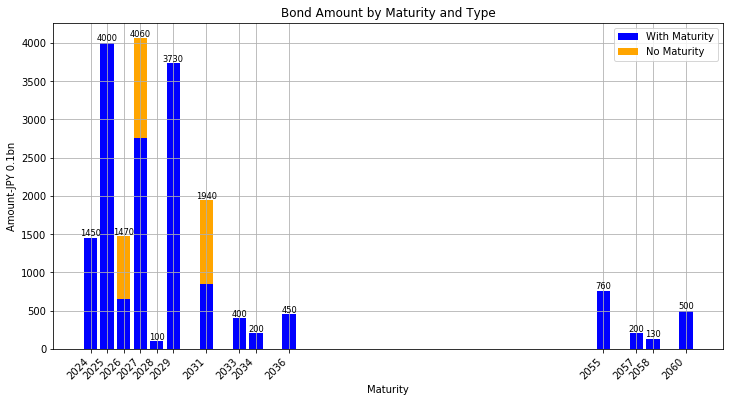

In [67]:
# 对数据进行分组，并计算每个组的总金额
grouped = df.groupby(['Maturity', 'Type'])['Amount'].sum().unstack().reset_index()
grouped = grouped.fillna(0)
grouped['total'] = grouped['With Maturity']+grouped['No Maturity']

# 绘制柱状图
plt.figure(figsize=(12, 6))

plt.bar(grouped['Maturity'], grouped['With Maturity'], color='blue', label='With Maturity')
plt.bar(grouped['Maturity'], grouped['No Maturity'], color='orange', label='No Maturity',bottom=grouped['With Maturity'])



# 旋转 x 轴标签
plt.xticks(grouped['Maturity'],rotation=45, ha='right')



# 显示网格线
plt.grid(True)

# 添加标签和标题
plt.xlabel('Maturity')
plt.ylabel('Amount-JPY 0.1bn')
plt.title('Bond Amount by Maturity and Type')
plt.legend(loc='upper right')

# 在每个柱状图上方添加数字标签
for i in range(len(grouped)):
    plt.text(grouped['Maturity'].iloc[i], grouped['total'].iloc[i], str(int(grouped['total'].iloc[i])), ha='center', va='bottom',size='small')


plt.show()

In [68]:
df

,Name,IssueDate,Maturity,Type,Interest,Amount(0.1bn jpy),Amount
0,USD-denominated Unsecured Bond due November 2024,"November 30,2022",2024,With Maturity,5.30275%,490.0,490.0
1,11th Unsecured Bond,"June 25,2019",2024,With Maturity,0.25%,100.0,100.0
2,8th Unsecured Bond,"June 6,2017",2024,With Maturity,0.32％,200.0,200.0
3,15th Unsecured Bond,"December 2,2021",2024,With Maturity,0.50％,190.0,190.0
4,USD-denominated Unsecured Bond due November 2024,"November 27,2019",2024,With Maturity,1.62730%,470.0,470.0
5,22nd Unsecured Bond,"February 10,2023",2025,With Maturity,3.30%,2500.0,2500.0
6,21st Unsecured Bond,"June 13,2022",2025,With Maturity,0.72%,1500.0,1500.0
7,Undated Subordinated NC5 Fixed Rate Reset Notes,"April 22,2021",2026,No Maturity,3.98746%,820.0,820.0
8,12th Unsecured Bond,"June 25,2019",2026,With Maturity,0.35%,200.0,200.0
9,16th Unsecured Bond,"December 2,2021",2026,With Maturity,0.60%,450.0,450.0
